In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

In [2]:
import numpy as np

indexes = np.random.randint(70000, size=7000)

xtrain = mnist.data[indexes][:4900]
xtest = mnist.data[indexes][4900:]

ytrain = mnist.target[indexes][:4900]
ytest = mnist.target[indexes][4900:]

# xtrain = mnist.data[:49000]
# xtest = mnist.data[49000:]

# ytrain = mnist.target[:49000]
# ytest = mnist.target[49000:]

In [3]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(50))

In [4]:
clf.fit(xtrain, ytrain)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=50, learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [5]:
import matplotlib.pyplot as plt

itest = 19

#images = xtest.reshape((-1, 28, 28))
#plt.imshow(images[itest],cmap=plt.cm.gray_r,interpolation="nearest")
#plt.show()

found_classes = clf.predict(xtest)

for itest in range(1,20):
    #itest = 4
    
    res =  " OK" if ytest[itest] == found_classes[itest] else ""

    print("Classe : " + ytest[itest] + " / Attendu " + found_classes[itest] + res)



Classe : 1 / Attendu 1 OK
Classe : 2 / Attendu 2 OK
Classe : 2 / Attendu 2 OK
Classe : 7 / Attendu 7 OK
Classe : 6 / Attendu 6 OK
Classe : 7 / Attendu 7 OK
Classe : 4 / Attendu 9
Classe : 4 / Attendu 4 OK
Classe : 6 / Attendu 6 OK
Classe : 4 / Attendu 4 OK
Classe : 1 / Attendu 1 OK
Classe : 2 / Attendu 2 OK
Classe : 5 / Attendu 3
Classe : 3 / Attendu 3 OK
Classe : 2 / Attendu 2 OK
Classe : 0 / Attendu 0 OK
Classe : 3 / Attendu 3 OK
Classe : 9 / Attendu 9 OK
Classe : 5 / Attendu 5 OK


In [6]:
from sklearn.metrics import precision_score

print("Score clf : " + str(clf.score(xtest, ytest)))
print("Score micro : " + str(precision_score(ytest, found_classes, average="micro")))
print("Score macro : " + str(precision_score(ytest, found_classes, average="macro")))
print("Score weighted : " + str(precision_score(ytest, found_classes, average="weighted")))

Score clf : 0.8509523809523809
Score micro : 0.8509523809523809
Score macro : 0.849070503393875
Score weighted : 0.8506416265098323


# Tests de précision
- 2 couches à 50 neurones
- 10 couches à 50 neurones
- 20 couches à 50 neurones
- 50 couches à 50 neurones
- 100 couches à 50 neurones

Puis faire 50 couches avec 60, 59, 58, ... neurones

Puis faire 20 couches avec 60, 57, 54, ... neurones

In [7]:
from sklearn.metrics import recall_score

import time

couche = (50,)
scores_couches_test = []
scores_couches_train = []
rappel_couches_test = []
time_couches = []

nb_couches = [1, 2, 10, 20, 50, 100]



for i in nb_couches:
    

    clf = MLPClassifier(hidden_layer_sizes=(couche*i))
    start_time = time.process_time()
    clf.fit(xtrain, ytrain)
    time_couches.append(time.process_time() - start_time)
    

    score_test = clf.score(xtest, ytest)
    scores_couches_test.append(score_test)
    
    score_train = clf.score(xtrain, ytrain)
    scores_couches_train.append(score_train)
    
    found_classes = clf.predict(xtest)
    rappel_test = recall_score(ytest, found_classes, average="micro")
    rappel_couches_test.append(rappel_test)
    
    
    print("Couches : " + str(i) + " -> te " + str(score_test))
    print("Couches : " + str(i) + " -> tr " + str(score_train))
    print("Couches : " + str(i) + " -> ra " + str(rappel_test))

    



Couches : 1 -> te 0.8857142857142857
Couches : 1 -> tr 1.0
Couches : 1 -> ra 0.8857142857142857
Couches : 2 -> te 0.8557142857142858
Couches : 2 -> tr 0.99
Couches : 2 -> ra 0.8557142857142858
Couches : 10 -> te 0.9257142857142857
Couches : 10 -> tr 1.0
Couches : 10 -> ra 0.9257142857142857
Couches : 20 -> te 0.9295238095238095
Couches : 20 -> tr 0.9951020408163266
Couches : 20 -> ra 0.9295238095238095
Couches : 50 -> te 0.11619047619047619
Couches : 50 -> tr 0.11469387755102041
Couches : 50 -> ra 0.11619047619047619
Couches : 100 -> te 0.11619047619047619
Couches : 100 -> tr 0.11469387755102041
Couches : 100 -> ra 0.11619047619047619


Text(0.5, 1.0, 'Score pour différents nombre de couches de 50 neurones')

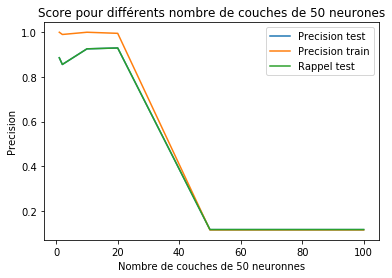

In [8]:
plt.plot([x for x in nb_couches], scores_couches_test)
plt.plot([x for x in nb_couches], scores_couches_train)
plt.plot([x for x in nb_couches], rappel_couches_test)


plt.legend(['Precision test', 'Precision train', "Rappel test"], loc='best')
plt.xlabel("Nombre de couches de 50 neuronnes")
plt.ylabel("Precision")
plt.title("Score pour différents nombre de couches de 50 neurones")

Text(0.5, 1.0, "Temps d'entrainement pour différents nombre de couches de 50 neurones")

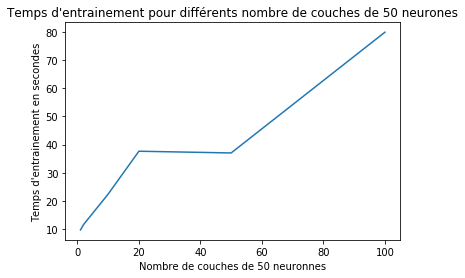

In [9]:
plt.plot([x for x in nb_couches], time_couches)

plt.xlabel("Nombre de couches de 50 neuronnes")
plt.ylabel("Temps d'entrainement en secondes")
plt.title("Temps d'entrainement pour différents nombre de couches de 50 neurones")

On voit sur notre graphique que la précision pour les données d'entrainement diminue également. cela signifie que notre algoritme n'arrive pas à généraliser notre modèle
# Overfitting
L'algorithme est tellement bien entrainé avec toutes les valeurs dont il dispose en train qui fait de mauvaises prédictions. Exemple avec la droite



Calculer la précision pour 50 couches de 60, puis 59, puis 58, ... neurones.

In [29]:
couches = (60,)
for i in range(59 , 10, -1):
    couches = couches + (i,)
    
# print(couches)


clf = MLPClassifier(hidden_layer_sizes=(couches))

start_time = time.process_time()
clf.fit(xtrain, ytrain)
exec_time = time.process_time() - start_time

print ("Exec time : " + str(exec_time))

Exec time : 25.79492171700076


In [30]:
score_test = clf.score(xtest, ytest)
score_train = clf.score(xtrain, ytrain)
print("Calculer la précision pour 50 couches de 60, puis 59, puis 58, ... neurones.")
print("Score test : " + str(score_test))
print("Score train : " + str(score_train))

Calculer la précision pour 50 couches de 60, puis 59, puis 58, ... neurones.
Score test : 0.11619047619047619
Score train : 0.11469387755102041


Calculer la précision pour 20 couches de 60, puis 57, puis 54, ... neurones.

In [31]:
couches = (60,)
for i in range(57 , 0, -3):
    couches = couches + (i,)
    
#print(couches)


clf = MLPClassifier(hidden_layer_sizes=(couches))

start_time = time.process_time()
clf.fit(xtrain, ytrain)
exec_time = time.process_time() - start_time

print ("Exec time : " + str(exec_time))

Exec time : 86.64072579899948


In [32]:
score_test = clf.score(xtest, ytest)
score_train = clf.score(xtrain, ytrain)
print("Calculer la précision pour 20 couches de 60, puis 57, puis 54, ... neurones.")

print("Score test : " + str(score_test))
print("Score train : " + str(score_train))

Calculer la précision pour 20 couches de 60, puis 57, puis 54, ... neurones.
Score test : 0.8476190476190476
Score train : 0.8948979591836734


In [14]:
import time

for count in range(0, 5):
    nb_couches = np.random.randint(1, high=11)

    for i in range(1, nb_couches+1):
        nb_neurones = np.random.randint(10, 311)

        if i == 1:
            couches = (nb_neurones,)
        else:
            couches = couches + (nb_neurones,)


    clf = MLPClassifier(hidden_layer_sizes=(couches))
    start_time = time.process_time()
    clf.fit(xtrain, ytrain)
    exec_time = time.process_time() - start_time


    score_test = clf.score(xtest, ytest)
    score_train = clf.score(xtrain, ytrain)

    print(str(couches))
    print("\t" + "-> " + str(exec_time) + " sec")
    print("\t" + "-> Score test : " + str(score_test))
    print("\t" + "-> Score train : " + str(score_train))

(231, 220, 281, 185, 271, 136)
	-> 56.22959830000002 sec
	-> Score test : 0.9261904761904762
	-> Score train : 1.0
(307, 10, 231, 216, 156, 158, 81, 53, 274, 218)
	-> 98.37815780199998 sec
	-> Score test : 0.9347619047619048
	-> Score train : 0.9906122448979592
(52, 166)
	-> 17.728370048999977 sec
	-> Score test : 0.8657142857142858
	-> Score train : 1.0
(288, 229, 265, 61, 307, 24)
	-> 41.91050278599994 sec
	-> Score test : 0.9438095238095238
	-> Score train : 0.9985714285714286
(187, 147, 186, 274)
	-> 34.57387570499998 sec
	-> Score test : 0.8966666666666666
	-> Score train : 1.0


# Différents algorithmes

Couches : 1 -> 0.1319047619047619
Couches : 1 -> 0.13673469387755102
Couches : 2 -> 0.9061904761904762
Couches : 2 -> 0.9987755102040816
Couches : 10 -> 0.920952380952381
Couches : 10 -> 1.0
Couches : 20 -> 0.8957142857142857
Couches : 20 -> 0.9567346938775511
Couches : 50 -> 0.11619047619047619
Couches : 50 -> 0.11469387755102041
Couches : 100 -> 0.11619047619047619
Couches : 100 -> 0.11469387755102041


Text(0.5, 1.0, 'Algorithme L-FBGS : Score pour différents nombre de couches de 50 neurones')

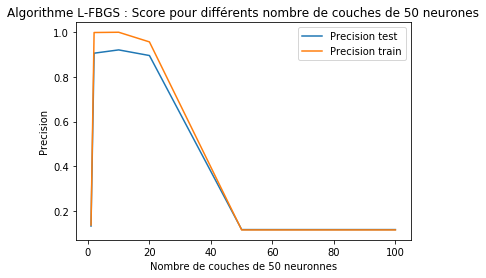

In [15]:
couche = (50,)
scores_couches_test = []
scores_couches_train = []
times_lbfgs = []

nb_couches = [1, 2, 10, 20, 50, 100]

for i in nb_couches:
    clf = MLPClassifier(hidden_layer_sizes=(couche*i), solver='lbfgs')
    
    start_time = time.process_time()
    clf.fit(xtrain, ytrain)
    exec_time = time.process_time() - start_time
    times_lbfgs.append(exec_time)
    
    score_test = clf.score(xtest, ytest)
    scores_couches_test.append(score_test)
    
    score_train = clf.score(xtrain, ytrain)
    scores_couches_train.append(score_train)
    
    print("Couches : " + str(i) + " -> " + str(score_test))
    print("Couches : " + str(i) + " -> " + str(score_train))
    
plt.plot([x for x in nb_couches], scores_couches_test)
plt.plot([x for x in nb_couches], scores_couches_train)

plt.legend(['Precision test', 'Precision train'], loc='upper right')
plt.xlabel("Nombre de couches de 50 neuronnes")
plt.ylabel("Precision")
plt.title("Algorithme L-FBGS : Score pour différents nombre de couches de 50 neurones")

Couches : 1 -> 0.3852380952380952
Couches : 1 -> 0.39387755102040817


/usr/local/insa/anaconda/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Couches : 2 -> 0.5961904761904762
Couches : 2 -> 0.6657142857142857
Couches : 10 -> 0.9085714285714286
Couches : 10 -> 1.0
Couches : 20 -> 0.8738095238095238
Couches : 20 -> 0.9510204081632653
Couches : 50 -> 0.11619047619047619
Couches : 50 -> 0.11469387755102041
Couches : 100 -> 0.11619047619047619
Couches : 100 -> 0.11469387755102041


Text(0.5, 1.0, 'Algorithme SGD : Score pour différents nombre de couches de 50 neurones')

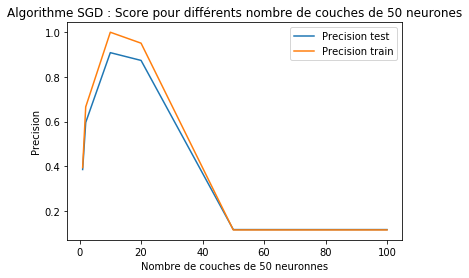

In [16]:
couche = (50,)
scores_couches_test = []
scores_couches_train = []
times_sgd = []

nb_couches = [1, 2, 10, 20, 50, 100]

for i in nb_couches:
    clf = MLPClassifier(hidden_layer_sizes=(couche*i), solver='sgd')

    start_time = time.process_time()
    clf.fit(xtrain, ytrain)
    exec_time = time.process_time() - start_time
    times_sgd.append(exec_time)
    
    score_test = clf.score(xtest, ytest)
    scores_couches_test.append(score_test)
    
    score_train = clf.score(xtrain, ytrain)
    scores_couches_train.append(score_train)
    
    print("Couches : " + str(i) + " -> " + str(score_test))
    print("Couches : " + str(i) + " -> " + str(score_train))
    
plt.plot([x for x in nb_couches], scores_couches_test)
plt.plot([x for x in nb_couches], scores_couches_train)

plt.legend(['Precision test', 'Precision train'], loc='upper right')
plt.xlabel("Nombre de couches de 50 neuronnes")
plt.ylabel("Precision")
plt.title("Algorithme SGD : Score pour différents nombre de couches de 50 neurones")

Couches : 1 -> 0.8776190476190476
Couches : 1 -> 0.9742857142857143
Couches : 2 -> 0.8576190476190476
Couches : 2 -> 1.0
Couches : 10 -> 0.9333333333333333
Couches : 10 -> 0.9985714285714286
Couches : 20 -> 0.9366666666666666
Couches : 20 -> 0.9934693877551021
Couches : 50 -> 0.9071428571428571
Couches : 50 -> 0.9726530612244898
Couches : 100 -> 0.11619047619047619
Couches : 100 -> 0.11469387755102041


Text(0.5, 1.0, 'Algorithme ADAM : Score pour différents nombre de couches de 50 neurones')

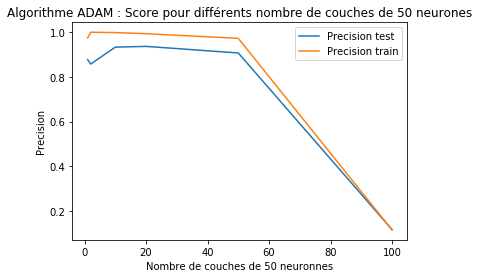

In [17]:
couche = (50,)
scores_couches_test = []
scores_couches_train = []
times_adam = []


nb_couches = [1, 2, 10, 20, 50, 100]

for i in nb_couches:
    clf = MLPClassifier(hidden_layer_sizes=(couche*i), solver='adam')
    
    start_time = time.process_time()
    clf.fit(xtrain, ytrain)
    exec_time = time.process_time() - start_time
    times_adam.append(exec_time)

    score_test = clf.score(xtest, ytest)
    scores_couches_test.append(score_test)
    
    score_train = clf.score(xtrain, ytrain)
    scores_couches_train.append(score_train)
    
    print("Couches : " + str(i) + " -> " + str(score_test))
    print("Couches : " + str(i) + " -> " + str(score_train))
    
plt.plot([x for x in nb_couches], scores_couches_test)
plt.plot([x for x in nb_couches], scores_couches_train)

plt.legend(['Precision test', 'Precision train'], loc='upper right')
plt.xlabel("Nombre de couches de 50 neuronnes")
plt.ylabel("Precision")
plt.title("Algorithme ADAM : Score pour différents nombre de couches de 50 neurones")

Text(0.5, 1.0, "Temps d'exécution pour différents solver et différentes couches intermédiaires")

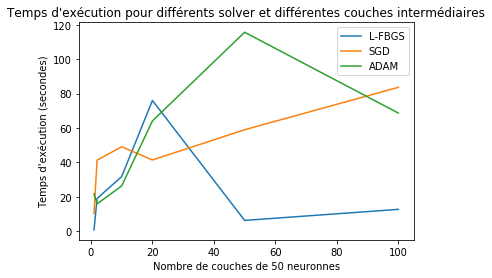

In [18]:
plt.plot([x for x in nb_couches], times_lbfgs)
plt.plot([x for x in nb_couches], times_sgd)
plt.plot([x for x in nb_couches], times_adam)

plt.legend(['L-FBGS', 'SGD', 'ADAM'], loc='best')
plt.xlabel("Nombre de couches de 50 neuronnes")
plt.ylabel("Temps d'exécution (secondes)")
plt.title("Temps d'exécution pour différents solver et différentes couches intermédiaires")

# Différentes activations


Couches : 1 -> 0.8852380952380953
Couches : 1 -> 0.9879591836734694
Couches : 2 -> 0.8823809523809524
Couches : 2 -> 0.9838775510204082
Couches : 10 -> 0.8680952380952381
Couches : 10 -> 0.9620408163265306
Couches : 20 -> 0.8766666666666667
Couches : 20 -> 0.9695918367346938
Couches : 50 -> 0.8814285714285715
Couches : 50 -> 0.9761224489795919
Couches : 100 -> 0.8380952380952381
Couches : 100 -> 0.9057142857142857


Text(0.5, 1.0, 'Activation IDENTITY : Score pour différents nombre de couches de 50 neurones')

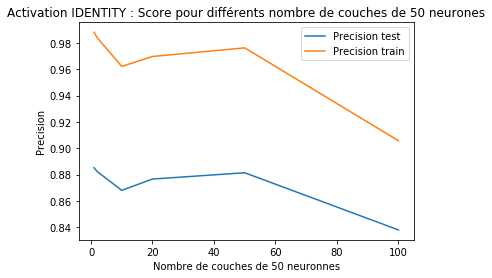

In [19]:
couche = (50,)
scores_couches_test = []
scores_couches_train = []
times_identity = []

nb_couches = [1, 2, 10, 20, 50, 100]

for i in nb_couches:
    clf = MLPClassifier(hidden_layer_sizes=(couche*i), activation='identity')
    start_time = time.process_time()
    clf.fit(xtrain, ytrain)
    exec_time = time.process_time() - start_time
    times_identity.append(exec_time)

    score_test = clf.score(xtest, ytest)
    scores_couches_test.append(score_test)
    
    score_train = clf.score(xtrain, ytrain)
    scores_couches_train.append(score_train)
    
    print("Couches : " + str(i) + " -> " + str(score_test))
    print("Couches : " + str(i) + " -> " + str(score_train))
    
plt.plot([x for x in nb_couches], scores_couches_test)
plt.plot([x for x in nb_couches], scores_couches_train)

plt.legend(['Precision test', 'Precision train'], loc='upper right')
plt.xlabel("Nombre de couches de 50 neuronnes")
plt.ylabel("Precision")
plt.title("Activation IDENTITY : Score pour différents nombre de couches de 50 neurones")

Couches : 1 -> 0.9128571428571428
Couches : 1 -> 0.9742857142857143
Couches : 2 -> 0.9152380952380952
Couches : 2 -> 0.9716326530612245
Couches : 10 -> 0.10380952380952381
Couches : 10 -> 0.10816326530612246
Couches : 20 -> 0.11619047619047619
Couches : 20 -> 0.11469387755102041
Couches : 50 -> 0.11619047619047619
Couches : 50 -> 0.11469387755102041
Couches : 100 -> 0.11619047619047619
Couches : 100 -> 0.11469387755102041


Text(0.5, 1.0, 'Activation LOGISTIC : Score pour différents nombre de couches de 50 neurones')

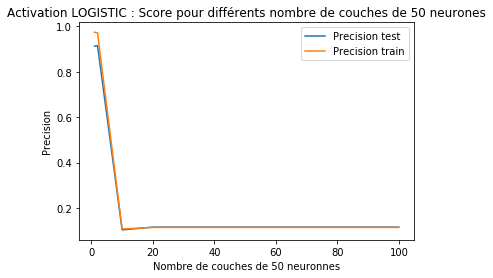

In [20]:
couche = (50,)
scores_couches_test = []
scores_couches_train = []
times_logistic = []

nb_couches = [1, 2, 10, 20, 50, 100]

for i in nb_couches:
    clf = MLPClassifier(hidden_layer_sizes=(couche*i), activation='logistic')

    start_time = time.process_time()
    clf.fit(xtrain, ytrain)
    exec_time = time.process_time() - start_time
    times_logistic.append(exec_time)
    
    
    score_test = clf.score(xtest, ytest)
    scores_couches_test.append(score_test)
    
    score_train = clf.score(xtrain, ytrain)
    scores_couches_train.append(score_train)
    
    print("Couches : " + str(i) + " -> " + str(score_test))
    print("Couches : " + str(i) + " -> " + str(score_train))
    
plt.plot([x for x in nb_couches], scores_couches_test)
plt.plot([x for x in nb_couches], scores_couches_train)

plt.legend(['Precision test', 'Precision train'], loc='upper right')
plt.xlabel("Nombre de couches de 50 neuronnes")
plt.ylabel("Precision")
plt.title("Activation LOGISTIC : Score pour différents nombre de couches de 50 neurones")

Couches : 1 -> 0.8885714285714286
Couches : 1 -> 0.9214285714285714
Couches : 2 -> 0.8871428571428571
Couches : 2 -> 0.9244897959183673
Couches : 10 -> 0.8604761904761905
Couches : 10 -> 0.8928571428571429
Couches : 20 -> 0.8695238095238095
Couches : 20 -> 0.8951020408163265
Couches : 50 -> 0.15666666666666668
Couches : 50 -> 0.15877551020408162
Couches : 100 -> 0.11619047619047619
Couches : 100 -> 0.11469387755102041


Text(0.5, 1.0, 'Activation TANH : Score pour différents nombre de couches de 50 neurones')

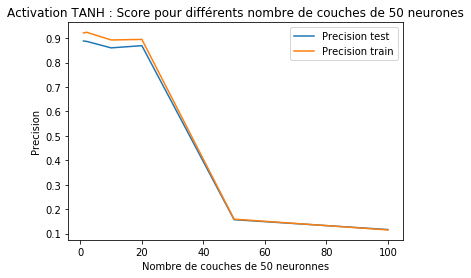

In [21]:
couche = (50,)
scores_couches_test = []
scores_couches_train = []
times_tanh = []


nb_couches = [1, 2, 10, 20, 50, 100]

for i in nb_couches:
    clf = MLPClassifier(hidden_layer_sizes=(couche*i), activation='tanh')
    
    start_time = time.process_time()
    clf.fit(xtrain, ytrain)
    exec_time = time.process_time() - start_time
    times_tanh.append(exec_time)
    

    score_test = clf.score(xtest, ytest)
    scores_couches_test.append(score_test)
    
    score_train = clf.score(xtrain, ytrain)
    scores_couches_train.append(score_train)
    
    print("Couches : " + str(i) + " -> " + str(score_test))
    print("Couches : " + str(i) + " -> " + str(score_train))
    
plt.plot([x for x in nb_couches], scores_couches_test)
plt.plot([x for x in nb_couches], scores_couches_train)

plt.legend(['Precision test', 'Precision train'], loc='upper right')
plt.xlabel("Nombre de couches de 50 neuronnes")
plt.ylabel("Precision")
plt.title("Activation TANH : Score pour différents nombre de couches de 50 neurones")

Couches : 1 -> 0.8771428571428571
Couches : 1 -> 1.0
Couches : 2 -> 0.8876190476190476
Couches : 2 -> 0.9740816326530612
Couches : 10 -> 0.9366666666666666
Couches : 10 -> 1.0
Couches : 20 -> 0.9204761904761904
Couches : 20 -> 0.99
Couches : 50 -> 0.11619047619047619
Couches : 50 -> 0.11469387755102041
Couches : 100 -> 0.11619047619047619
Couches : 100 -> 0.11469387755102041


Text(0.5, 1.0, 'Activation RELU : Score pour différents nombre de couches de 50 neurones')

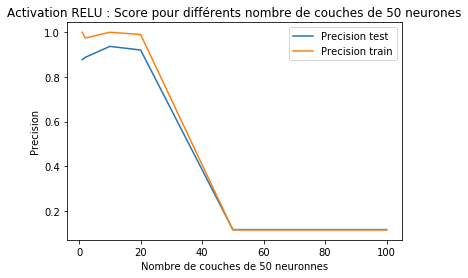

In [22]:
couche = (50,)
scores_couches_test = []
scores_couches_train = []
times_relu = []

nb_couches = [1, 2, 10, 20, 50, 100]

for i in nb_couches:
    clf = MLPClassifier(hidden_layer_sizes=(couche*i), activation='relu')

    start_time = time.process_time()
    clf.fit(xtrain, ytrain)
    exec_time = time.process_time() - start_time
    times_relu.append(exec_time)
    
    score_test = clf.score(xtest, ytest)
    scores_couches_test.append(score_test)
    
    score_train = clf.score(xtrain, ytrain)
    scores_couches_train.append(score_train)
    
    print("Couches : " + str(i) + " -> " + str(score_test))
    print("Couches : " + str(i) + " -> " + str(score_train))
    
plt.plot([x for x in nb_couches], scores_couches_test)
plt.plot([x for x in nb_couches], scores_couches_train)

plt.legend(['Precision test', 'Precision train'], loc='upper right')
plt.xlabel("Nombre de couches de 50 neuronnes")
plt.ylabel("Precision")
plt.title("Activation RELU : Score pour différents nombre de couches de 50 neurones")

Text(0.5, 1.0, "Temps d'exécution pour différentes fonction d'activation et différents couches intermédiaires")

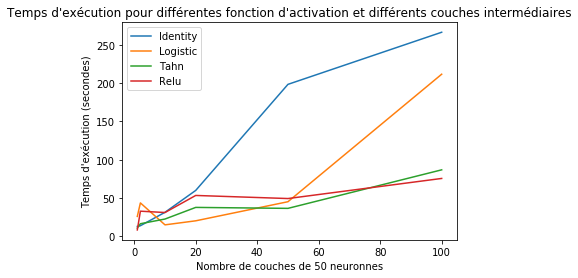

In [23]:
plt.plot([x for x in nb_couches], times_identity)
plt.plot([x for x in nb_couches], times_logistic)
plt.plot([x for x in nb_couches], times_tanh)
plt.plot([x for x in nb_couches], times_relu)

plt.legend(['Identity', 'Logistic', 'Tahn', 'Relu'], loc='best')
plt.xlabel("Nombre de couches de 50 neuronnes")
plt.ylabel("Temps d'exécution (secondes)")
plt.title("Temps d'exécution pour différentes fonction d'activation et différents couches intermédiaires")

# Différents alphas

Couches : 1 -> 0.8704761904761905
Couches : 1 -> 0.9748979591836735
Couches : 2 -> 0.8790476190476191
Couches : 2 -> 1.0
Couches : 10 -> 0.9342857142857143
Couches : 10 -> 0.9963265306122449
Couches : 20 -> 0.9295238095238095
Couches : 20 -> 0.9955102040816326
Couches : 50 -> 0.8428571428571429
Couches : 50 -> 0.8946938775510204
Couches : 100 -> 0.11619047619047619
Couches : 100 -> 0.11469387755102041
Couches : 1 -> 0.8795238095238095
Couches : 1 -> 0.9773469387755102
Couches : 2 -> 0.8519047619047619
Couches : 2 -> 0.9997959183673469
Couches : 10 -> 0.9333333333333333
Couches : 10 -> 1.0
Couches : 20 -> 0.9252380952380952
Couches : 20 -> 0.9940816326530613
Couches : 50 -> 0.11619047619047619
Couches : 50 -> 0.11469387755102041
Couches : 100 -> 0.11619047619047619
Couches : 100 -> 0.11469387755102041
Couches : 1 -> 0.8804761904761905
Couches : 1 -> 0.9997959183673469
Couches : 2 -> 0.8728571428571429
Couches : 2 -> 1.0
Couches : 10 -> 0.9328571428571428
Couches : 10 -> 0.99877551020408

/usr/local/insa/anaconda/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Couches : 2 -> 0.9147619047619048
Couches : 2 -> 1.0
Couches : 10 -> 0.95
Couches : 10 -> 1.0
Couches : 20 -> 0.9314285714285714
Couches : 20 -> 0.996938775510204
Couches : 50 -> 0.11619047619047619
Couches : 50 -> 0.11469387755102041
Couches : 100 -> 0.11619047619047619
Couches : 100 -> 0.11469387755102041


'\nplt.legend([\'Precision test\', \'Precision train\'], loc=\'upper right\')\nplt.xlabel("Nombre de couches de 50 neuronnes")\nplt.ylabel("Precision")\nplt.title("Activation ALPHA=" + str(alpha) + " : Score pour différents nombre de couches de 50 neurones")\n'

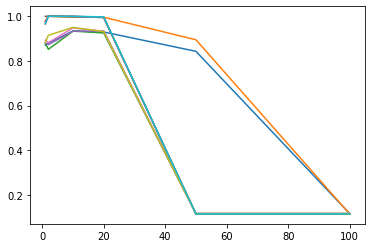

In [24]:
couche = (50,)

scores_test = []
scores_train = []
times_alphas = []

nb_couches = [1, 2, 10, 20, 50, 100]
alphas = [0.0001, 0.001, 0.01, 0.1, 1]

for alpha in alphas:
    times = []
    scores_couches_test = []
    scores_couches_train = []
    

    for i in nb_couches:
        clf = MLPClassifier(hidden_layer_sizes=(couche*i), alpha=alpha)
    
        start_time = time.process_time()
        clf.fit(xtrain, ytrain)
        exec_time = time.process_time() - start_time
        times.append(exec_time)
        
        
        score_test = clf.score(xtest, ytest)
        scores_couches_test.append(score_test)

        score_train = clf.score(xtrain, ytrain)
        scores_couches_train.append(score_train)

        print("Couches : " + str(i) + " -> " + str(score_test))
        print("Couches : " + str(i) + " -> " + str(score_train))

    times_alphas.append(times)
    scores_test.append(scores_couches_test)
    scores_train.append(scores_couches_train)

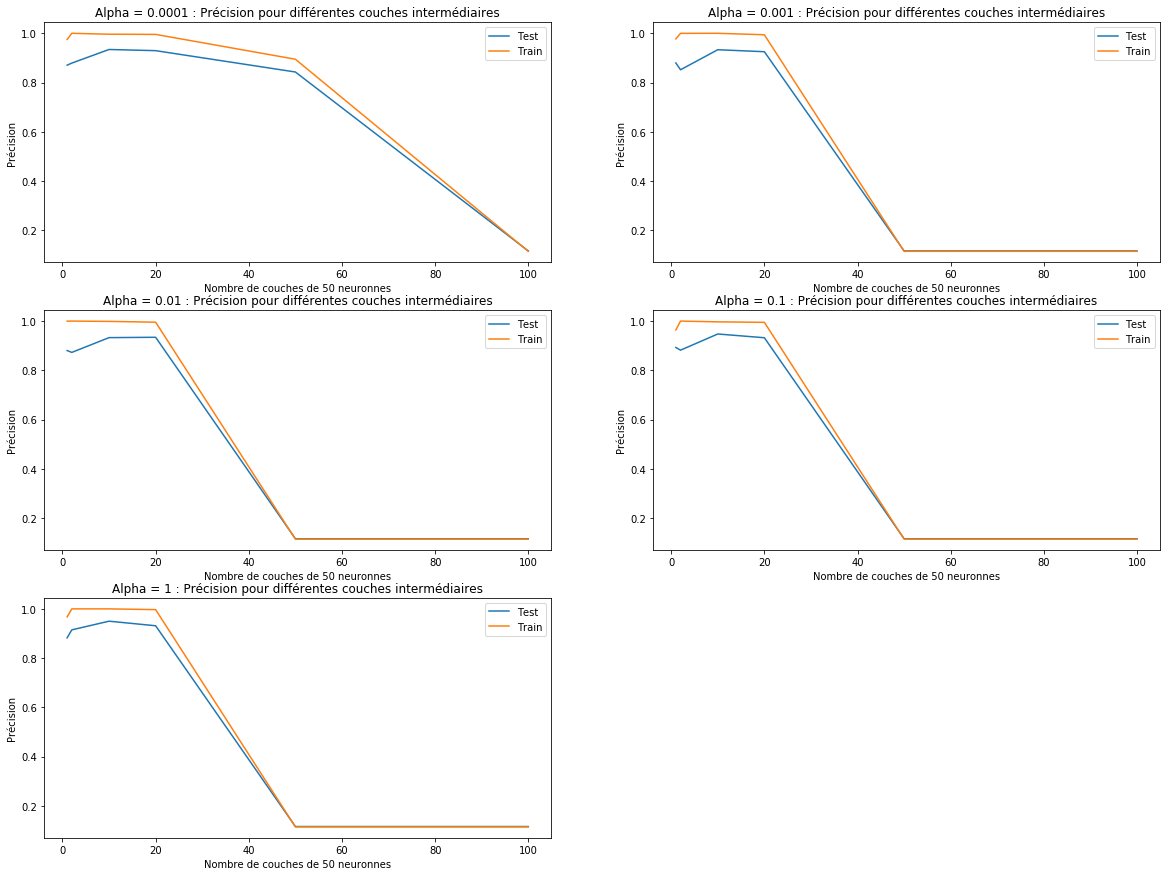

In [25]:
plt.figure(figsize=(20, 15))

i = 0
for alpha in alphas:
    plt.subplot(3, 2, i+1)
    plt.plot([x for x in nb_couches], scores_test[i])
    plt.plot([x for x in nb_couches], scores_train[i])
    plt.legend(['Test', 'Train'], loc='best')
    plt.xlabel("Nombre de couches de 50 neuronnes")
    plt.ylabel("Précision")
    plt.title("Alpha = " + str(alpha) + " : Précision pour différentes couches intermédiaires")
    i = i + 1

    

Text(0.5, 1.0, "Alpha = 1 : Temps d'entrainement")

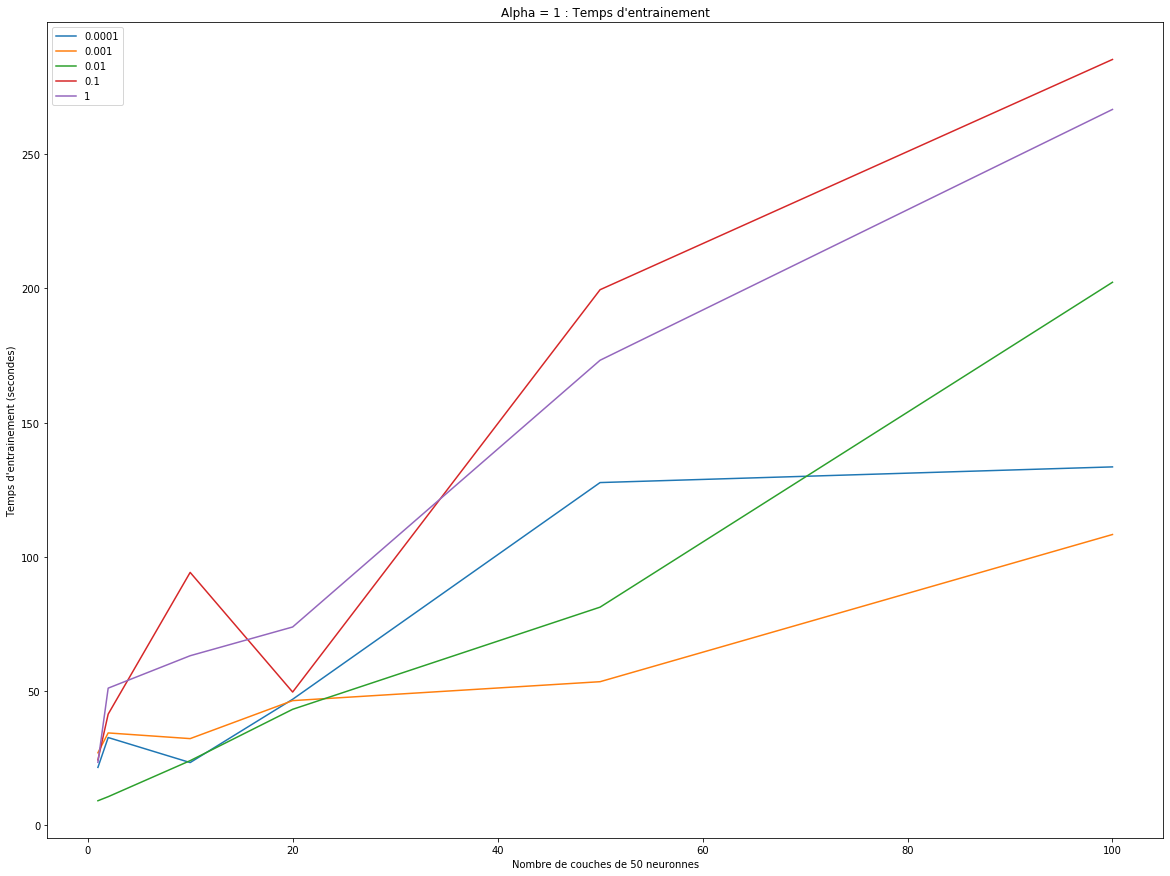

In [26]:
plt.figure(figsize=(20, 15))

i = 0
for alpha in alphas:
    plt.plot([x for x in nb_couches], times_alphas[i])
    i = i + 1
    
plt.legend([a for a in alphas], loc='best')
plt.xlabel("Nombre de couches de 50 neuronnes")
plt.ylabel("Temps d'entrainement (secondes)")
plt.title("Alpha = " + str(alpha) + " : Temps d'entrainement")